Imports

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import itertools
from sklearn.metrics import confusion_matrix



ModuleNotFoundError: No module named 'pandas'

In [ ]:
%run "src/visualizations.ipynb"
%matplotlib inline

ModuleNotFoundError: No module named 'umap'

ModuleNotFoundError: No module named 'umap'

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU")

Using GPU


Making Dataset

In [ ]:
torch.manual_seed(0)

data_path = "..\data"
data = torchvision.datasets.ImageFolder(data_path, transform=torchvision.transforms.ToTensor())

In [ ]:
data[0][0].shape

torch.Size([3, 256, 256])

In [ ]:
NUM_CLASSES = len(os.listdir(data_path))
print(f"Identified {NUM_CLASSES} classes...")

class_name = os.listdir(data_path)
print(class_name)

Identified 4 classes...
['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']


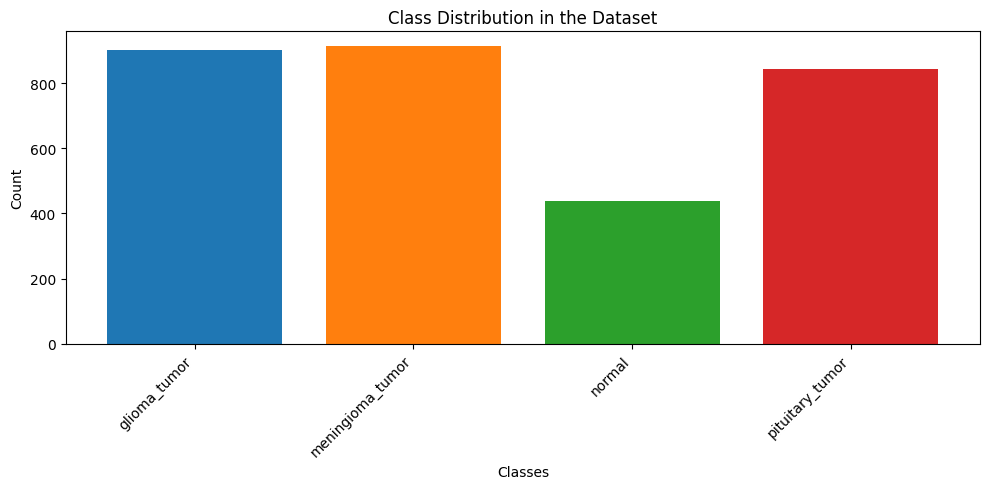

In [ ]:

labels = [label for _, label in data]
label_counts = np.bincount(labels)
class_names = [folder_name for folder_name in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder_name))]

plt.figure(figsize=(10, 5))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.bar(class_names, label_counts[:len(class_names)], color=bar_colors)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution in the Dataset")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Split as a train and testing set:

In [ ]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

train_size = int(train_ratio * len(data))
val_size = int(val_ratio * len(data))
test_size = len(data) - (train_size + val_size)

train_set, val_set, test_set = torch.utils.data.random_split(data, [train_size, val_size, test_size])
print('Data loaded and split into training, valadation and testing datasets')


Data loaded and split into training, valadation and testing datasets


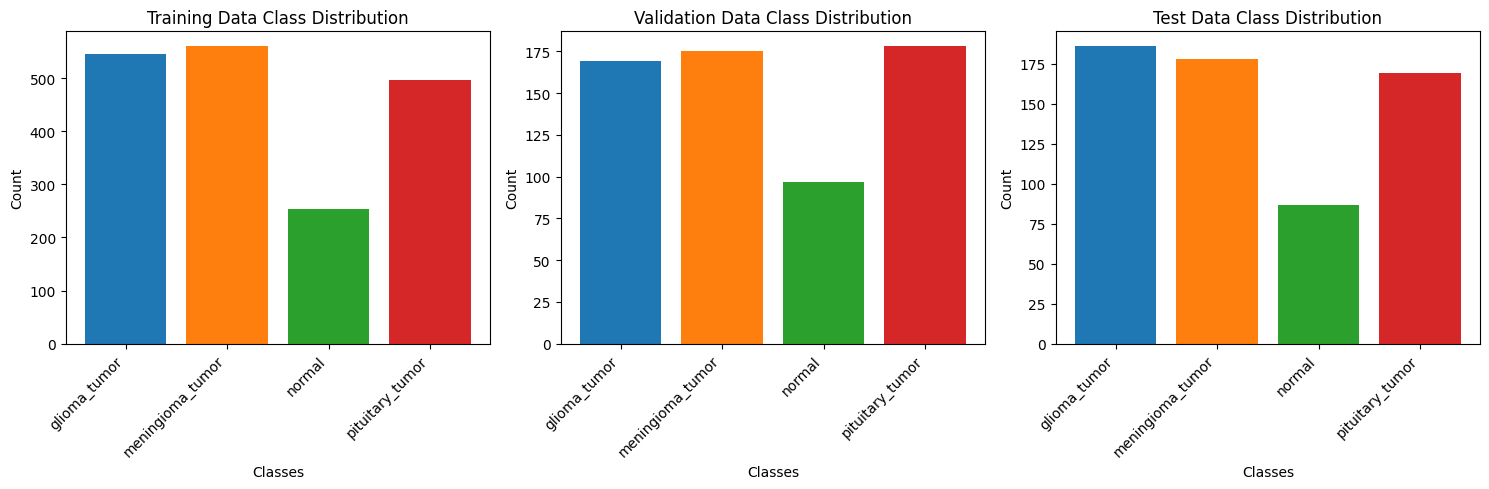

In [ ]:
train_labels = [label for _, label in train_set]
val_labels = [label for _, label in val_set]
test_labels = [label for _, label in test_set]



train_label_counts = np.bincount(train_labels)
val_label_counts = np.bincount(val_labels)
test_label_counts = np.bincount(test_labels)

bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(class_names, train_label_counts[:len(class_names)], color=bar_colors)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Training Data Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.bar(class_names, val_label_counts[:len(class_names)], color=bar_colors)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Validation Data Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.bar(class_names, test_label_counts[:len(class_names)], color=bar_colors)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Test Data Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

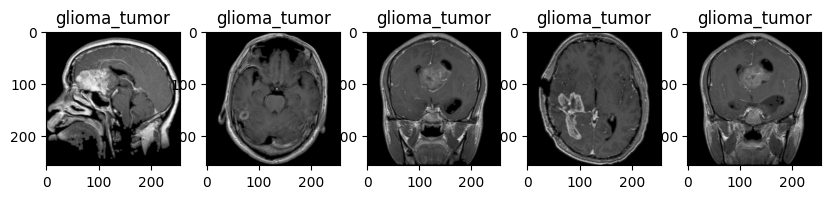

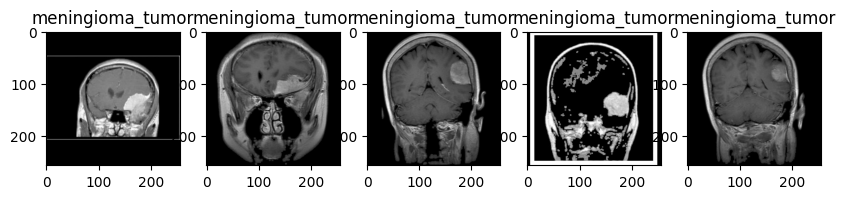

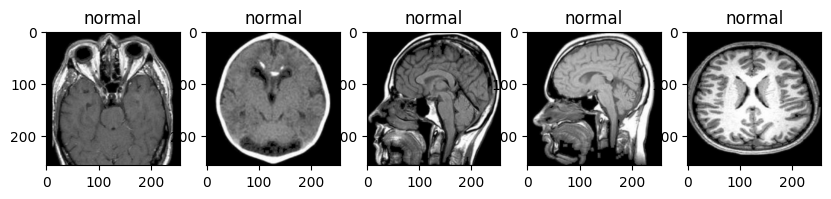

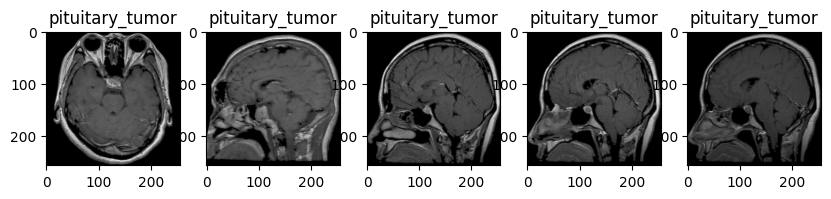

In [ ]:
batch_size = 32  
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size,shuffle=True)

directory=os.listdir(data_path)
for each in directory:
    plt.figure(figsize=(10, 10))
    currentFolder = data_path + '/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = data_path + '/' + each + "/" + file
        img=mpimg.imread(fullpath)
        ax=plt.subplot(1,5,i+1)
        ax.set_title(each)
        plt.imshow(img)

Visualizations using PCA

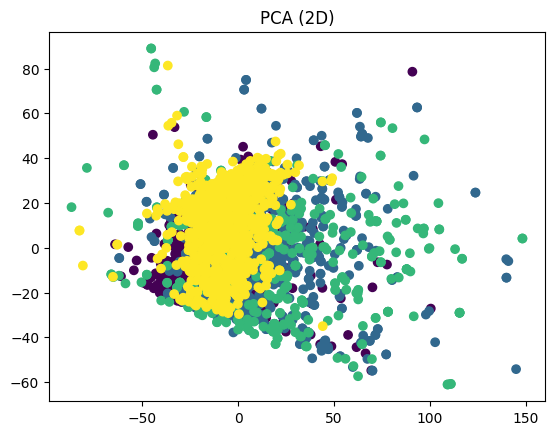

In [ ]:
images = [data[i][0].numpy().flatten() for i in range(len(data))]
labels = [data[i][1] for i in range(len(data))]

plot_pca_images(images, labels,2)


In [ ]:
plot_pca_images_3d_plotly(images, labels)

Visualizations using UMAP

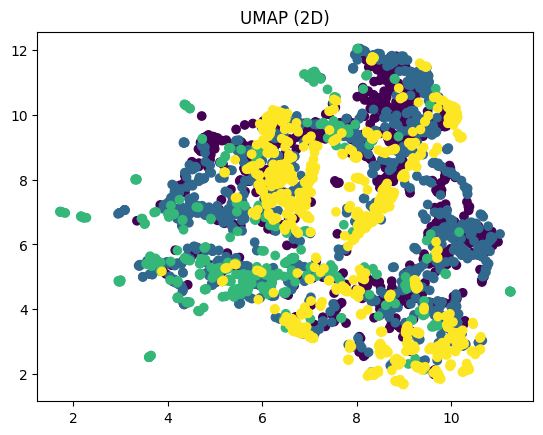

In [ ]:
plot_umap_images(images,labels,2)


In [ ]:
plot_umap_images_3d_plotly(images,labels)

Visualizations using t-SNE

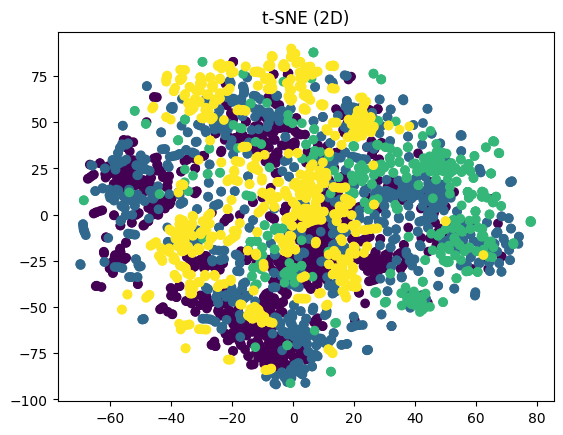

In [ ]:
plot_tsne_images(images,labels,2)


In [ ]:
plot_tsne_images_3d_plotly(images,labels)

Grayscaled Data Representation:

In [ ]:
data_path = "..\data"
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])
data_grayscale = torchvision.datasets.ImageFolder(root=data_path, transform=transform)
images_grayscale = [data_grayscale[i][0].numpy().flatten() for i in range(len(data_grayscale))]
labels_grayscale = [data_grayscale[i][1] for i in range(len(data_grayscale))]


PCA:

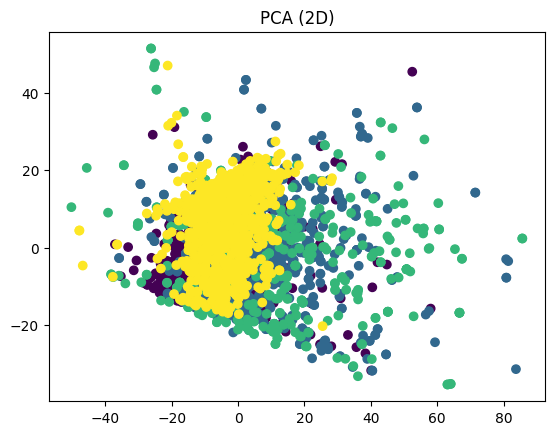

In [ ]:
plot_pca_images(images_grayscale, labels_grayscale,2)

3d:

In [ ]:
plot_pca_images_3d_plotly(images_grayscale, labels_grayscale)

UMAP:

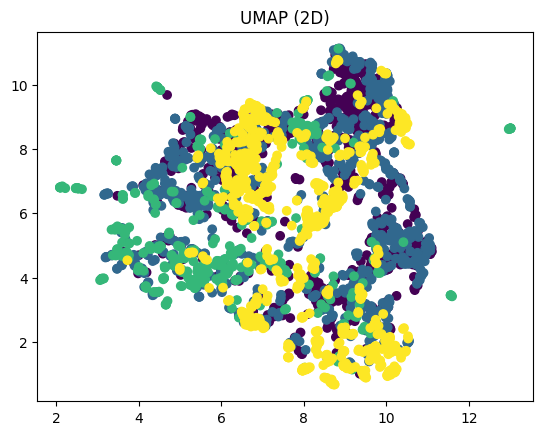

In [ ]:
plot_umap_images(images_grayscale, labels_grayscale,2)

3d:

In [ ]:
plot_umap_images_3d_plotly(images_grayscale, labels_grayscale)

t-SNE

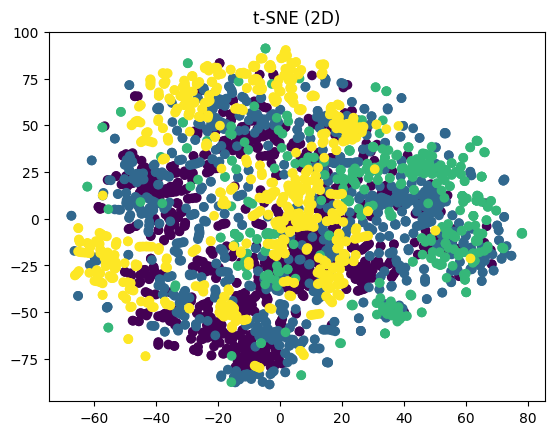

In [ ]:
plot_tsne_images(images_grayscale, labels_grayscale,2)

3d:

In [ ]:
plot_tsne_images_3d_plotly(images_grayscale, labels_grayscale)